# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np


In [12]:
df_raw = pd.read_csv("assets/admissions.csv")
df = df_raw.dropna() 
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables

In [13]:
# frequency table for prestige and whether or not someone was admitted
print df.prestige.value_counts()
print df.admit.value_counts()

pd.crosstab(df['admit'],df['prestige'])

2.0    148
3.0    121
4.0     67
1.0     61
Name: prestige, dtype: int64
0    271
1    126
Name: admit, dtype: int64


prestige,1.0,2.0,3.0,4.0
admit,,,,
0,28,95,93,55
1,33,53,28,12


## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

In [14]:
df = pd.get_dummies(df, columns=['prestige'])
df.head()

,admit,gre,gpa,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0,0,1,0
1,1,660.0,3.67,0,0,1,0
2,1,800.0,4.00,1,0,0,0
3,1,640.0,3.19,0,0,0,1
4,0,520.0,2.93,0,0,0,1


#### 2.2 When modeling our class variables, how many do we need? 



Answer: We only need 3 (k-1), which can be done by specifying drop_first=True

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [15]:
# cols_to_keep = ['admit', 'gre', 'gpa']
# handCalc = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_1':])
# print handCalc.head()

In [16]:
# crosstab prestige 1 admission 
# frequency table cutting prestige and whether or not someone was admitted
pd.crosstab(df['admit'],df['prestige_1.0'])

prestige_1.0,0,1
admit,,
0,243,28
1,93,33


#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [17]:
# Odds = p/(1-p)

numerator = 33 / 61
denominator = 28 / 61

print 'odds ratio is 33:28'

odds ratio is 33:28


#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [22]:
numerator = len(df[(df['prestige_1.0']==0) & (df['admit']==1)])
denominator = len(df[(df['prestige_1.0']==0) & (df['admit']==0)])

print 'odds ratio is {}:{}'.format(numerator, denominator)

odds ratio is 93:243


#### 3.3 Calculate the odds ratio

In [27]:
num = float(33) / float(28)
den = float(93) / float(243)

odds_ratio = num / den

print odds_ratio

3.07949308756


#### 3.4 Write this finding in a sentenance: 

Answer: Your odds of being admitted if you attended a #1 ranked college is 3.1 times better than if you didn't attend a #1 ranked college

#### 3.5 Print the cross tab for prestige_4

In [28]:
pd.crosstab(df['admit'],df['prestige_4.0'])

prestige_4.0,0,1
admit,,
0,216,55
1,114,12


#### 3.6 Calculate the OR 

In [29]:
numerator = float(12) / float(55)
denominator = float(114) / float(216)

odds_ratio = numerator / denominator

print odds_ratio

0.413397129187


#### 3.7 Write this finding in a sentence

Answer: Your odds of being admitted if you come from a #4 ranked college is 0.41 times that if you didn't come from a #4 ranked college

## Part 4. Analysis

In [32]:
df = df_raw.dropna() 
df = pd.get_dummies(df, columns=['prestige'], drop_first=True)

We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [34]:
# manually add the intercept
df['intercept'] = 1.0
print df.head()

   admit    gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0  intercept
0      0  380.0  3.61             0             1             0        1.0
1      1  660.0  3.67             0             1             0        1.0
2      1  800.0  4.00             0             0             0        1.0
3      1  640.0  3.19             0             0             1        1.0
4      0  520.0  2.93             0             0             1        1.0


#### 4.1 Set the covariates to a variable called train_cols

In [52]:
train_cols = ['gre','gpa','prestige_2.0','prestige_3.0','prestige_4.0','intercept']

#### 4.2 Fit the model

In [53]:
model = sm.Logit(df['admit'], df[train_cols])

results = model.fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


#### 4.3 Print the summary results

In [54]:
print results.summary()

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Sat, 25 Feb 2017   Pseudo R-squ.:                 0.08166
Time:                        17:21:16   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
gre              0.0022      0.001      2.028      0.043      7.44e-05     0.004
gpa              0.7793      0.333      2.344      0.019         0.128     1.431
prestige_2.0    -0.6801      0.317     -2.14

#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

In [55]:
# odds ratio
print np.exp(results.params)

gre             1.002221
gpa             2.180027
prestige_2.0    0.506548
prestige_3.0    0.262192
prestige_4.0    0.211525
intercept       0.020716
dtype: float64


In [56]:
conf = results.conf_int()
params = results.params
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print np.exp(conf)

                  2.5%     97.5%        OR
gre           1.000074  1.004372  1.002221
gpa           1.136120  4.183113  2.180027
prestige_2.0  0.272168  0.942767  0.506548
prestige_3.0  0.133377  0.515419  0.262192
prestige_4.0  0.093329  0.479411  0.211525
intercept     0.002207  0.194440  0.020716


#### 4.5 Interpret the OR of Prestige_2

Answer: The odds of being admitted decrease by ~51% if the prestige ranking of the college is 2.

#### 4.6 Interpret the OR of GPA

Answer: For every 1 unit increase in GPA, the odds of being admitted increases by 2.18 times.

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [57]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [66]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(df['gre'].min(), df['gre'].max(), 10)
print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(df['gpa'].min(), df['gpa'].max(), 10)
print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


#### 5.1 Recreate the dummy variables

In [67]:
# recreate the dummy variables
combos.columns = ['gre', 'gpa', 'prestige', 'intercept']
# keep only what we need for making predictions
combos = pd.get_dummies(combos, columns=['prestige'], drop_first=True)
combos.head()

,gre,gpa,intercept,prestige_2.0,prestige_3.0,prestige_4.0
0,220.0,2.260000,1.0,0,0,0
1,220.0,2.260000,1.0,1,0,0
2,220.0,2.260000,1.0,0,1,0
3,220.0,2.260000,1.0,0,0,1
4,220.0,2.453333,1.0,0,0,0


#### 5.2 Make predictions on the enumerated dataset

In [72]:
combos['admit_pred'] = results.predict(combos[train_cols])
combos.tail(4)

,gre,gpa,intercept,prestige_2.0,prestige_3.0,prestige_4.0,admit_pred
396,800.0,4.0,1.0,0,0,0,0.734040
397,800.0,4.0,1.0,1,0,0,0.582995
398,800.0,4.0,1.0,0,1,0,0.419833
399,800.0,4.0,1.0,0,0,1,0.368608


#### 5.3 Interpret findings for the last 4 observations

Answer: With GRE = 800 and GPA = 4.0, the predicted admit likelihood is 73% for a student who attended a #1 ranked college, 58% for a #2 college, 42% for a #3 college, and 37% for a #4 college.

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.

In [73]:
import seaborn as sns
%matplotlib inline

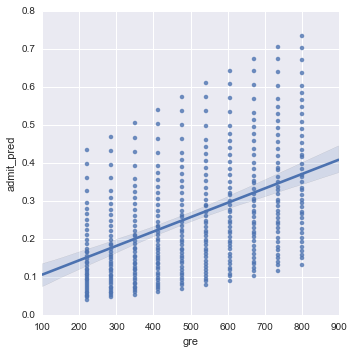

In [75]:
g1 = sns.lmplot(x='gre', y='admit_pred', data=combos)
g1;

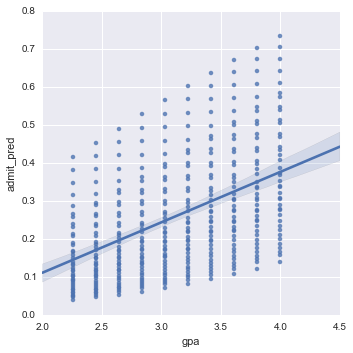

In [76]:
g2 = sns.lmplot(x='gpa', y='admit_pred', data=combos)
g2;